In [1]:
import os 
os.chdir('C:\\Users\\tejas\\Desktop\\PythonProject\\Python Project - Bank Lending')
print(os.getcwd())

C:\Users\tejas\Desktop\PythonProject\Python Project - Bank Lending


In [2]:
import pandas as pd 
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)


from sklearn import preprocessing,metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [3]:
Loan_data= pd.read_csv('XYZ.txt', sep='\t')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
Loan_data.shape

(855969, 73)

# Dropping Variables with Null Values more than 30%

In [5]:
# Dropping Variables with null values more than 30%
Cut_off = len(Loan_data)*0.7
print(Cut_off)

599178.2999999999


In [6]:
Loan_data = Loan_data.dropna(thresh= Cut_off, axis =1 )

In [7]:
Loan_data.shape

(855969, 52)

# Dropping Variables that are redundant or not availabe at the time of loan application 

In [8]:
Loan_data= Loan_data.drop(['id','member_id','funded_amnt', 'funded_amnt_inv','title', 'zip_code',
                           'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee','last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d','installment','emp_title'], axis=1)

In [9]:
Loan_data.shape

(855969, 34)

# Drop Duplicates if any present

In [10]:
Loan_data=Loan_data.drop_duplicates()


In [11]:
Loan_data.shape

(855969, 34)

# Dropping variables with one unique value

In [12]:
unique = Loan_data.nunique()
unique = unique[unique.values == 1]
Loan_data.drop(labels = list(unique.index), axis =1, inplace=True)

In [13]:
Loan_data.shape

(855969, 33)

In [14]:
print(Loan_data.columns.tolist())

['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'recoveries', 'collection_recovery_fee', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind']


# Data Preparation  
Null Value Treatment 

In [15]:
Loan_data.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      446
total_acc                         0
initial_list_status               0
recoveries                        0
collection_recovery_fee           0
last_credit_pull_d               50
collections_12_mths_ex_med       56
application_type            

In [16]:
categorical_col=['emp_length','last_credit_pull_d','collections_12_mths_ex_med']
for col in categorical_col:
    Loan_data[col]=Loan_data[col].fillna(Loan_data[col].mode()[0])

In [17]:
Contiuous_col=['revol_util','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']
for col in Contiuous_col:
    Loan_data[col]= Loan_data[col].fillna(Loan_data[col].median())

In [18]:
Loan_data.isna().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
recoveries                    0
collection_recovery_fee       0
last_credit_pull_d            0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_re

# Feature Insights and Data Visualization

In [19]:
def plot_var(col_name, full_name,continuous):
    f,(ax1,ax2) = plt.subplots(nrows=1, ncols =2 , figsize = (12,3), dpi = 90)
     
    if continuous:
            sns.distplot(Loan_data.loc[Loan_data[col_name].notnull(), col_name], kde=False, ax=ax1)
    else :
        sns.countplot(Loan_data[col_name], order= sorted(Loan_data[col_name].unique()), color='#483D8B', saturation = 1 , ax= ax1)
        ax1.set_xlabel(full_name)
        ax1.set_ylabel('Count')
        ax1.set_title(full_name)
        
    
    if continuous:
        sns.boxplot(x= 'default_ind',y=col_name, data=Loan_data, ax = ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name+ 'default_ind')
        ax2.set_xlabel('Default')
        ax2.set_ylabel(full_name)
    else:
        Default_rates = Loan_data.groupby(col_name)['default_ind'].value_counts(normalize=True).loc[:,1]
        sns.barplot(x=Default_rates.index, y=Default_rates.values, color='#48D1CC', saturation=1, ax=ax2)
        ax2.set_xlabel(full_name)
        ax2.set_ylabel('Fraction of Loans Defaulted')
         
    
    ax2.set_title('Default_Rate by ' + full_name)
   
    
    plt.tight_layout()

# Loan Amount

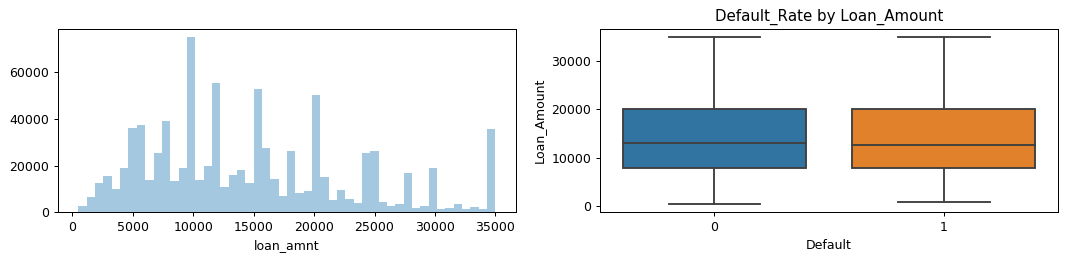

In [20]:
plot_var('loan_amnt', 'Loan_Amount', continuous= True)

In [21]:
Loan_data.groupby('default_ind')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,14755.476206,8427.151810,500.0,8000.0,13000.0,20000.0,35000.0
1,46467.0,14573.018486,8391.928489,900.0,8000.0,12700.0,20000.0,35000.0


Inference:
Multimodal Distribution observed.
The Loan amount is shown for the defaulters and non defaulters using the boxplot.It's seen that mean loan amount disbursed remains almost the same differing  by $182.4577. The Maximum Loan Amount disbursed for both the defaulters and non-defaulters is the same

 

# Interest Rate

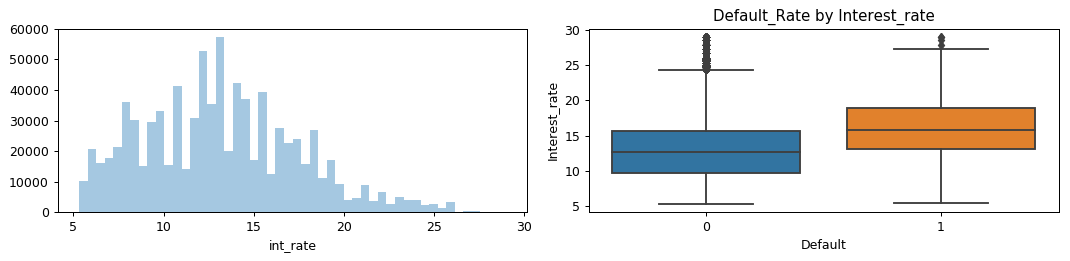

In [22]:
plot_var('int_rate','Interest_rate', continuous= True)

In [23]:
Loan_data.groupby('default_ind')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,13.030057,4.316366,5.32,9.76,12.69,15.61,28.99
1,46467.0,16.019092,4.301283,5.42,13.05,15.80,18.92,28.99


Inference:Skewed Disturbtion 
The Interest Rate for defaulters and non-defaulters is shown through a box plot . it's seen that the defaulters have an have mean interest rate of 15.8 % (min (5.32%), max(28.99). The non-defaulters having a mean interest rate of 12.69% (min(5.42%),max(28.99))

 



# Loan Term

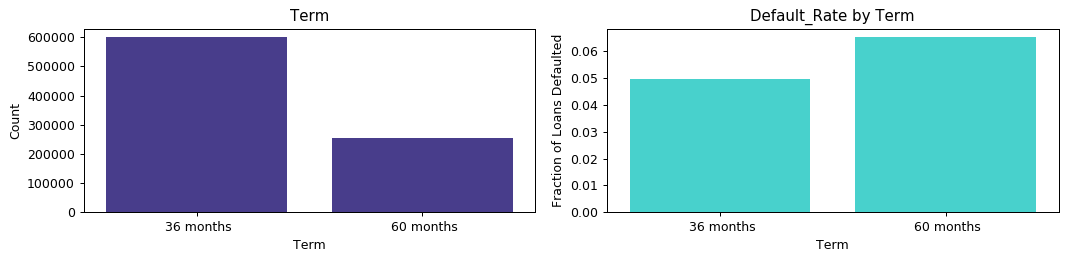

In [24]:
plot_var('term','Term', continuous= False)

In [25]:
Loan_data.term = Loan_data.term.str.replace('months', '').astype(np.int)
Loan_data.term.value_counts()

36    600221
60    255748
Name: term, dtype: int64

In [26]:
Loan_data.groupby('default_ind')['term'].value_counts(normalize=True)

default_ind  term
0            36      0.704659
             60      0.295341
1            36      0.641272
             60      0.358728
Name: term, dtype: float64

Inference:
Loan Term is plotted against Defaulted using bar plot . Its seen that for the term from 36 months the fraction of loan defaulted is around 5% and for the term 60 months  it is over 6%

# Grade

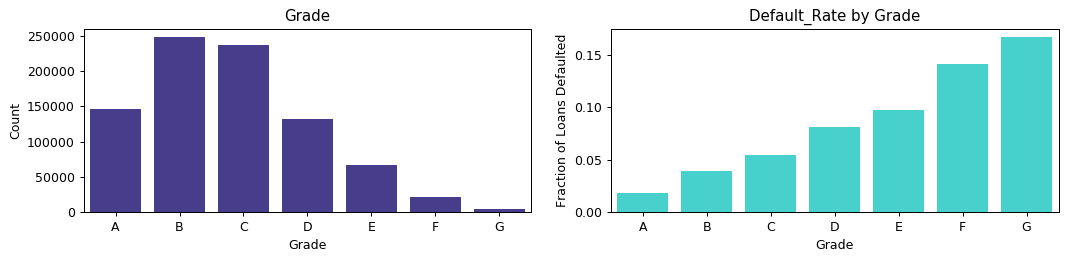

In [27]:
plot_var('grade','Grade', continuous= False)

In [28]:
Loan_data['grade'] = Loan_data['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})


In [26]:
Loan_data.groupby('grade')['default_ind'].value_counts()

grade  default_ind
A      0              143001
       1                2664
B      0              238281
       1                9717
C      0              223853
       1               13002
D      0              122004
       1               10798
E      0               59989
       1                6459
F      0               18315
       1                3013
G      0                4059
       1                 814
Name: default_ind, dtype: int64

Inference:
Grade is plotted is against Defaulters using barplot . The customers are segmented grade wise with their risk in the descending order (G>F>E>D>C>B>A).

# Employment Length

In [29]:
Loan_data['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)

In [30]:
Loan_data['emp_length'].replace('< 1 year', '0 years', inplace=True)

In [31]:
def emp(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

In [32]:
Loan_data['emp_length'] = Loan_data['emp_length'].apply(emp)

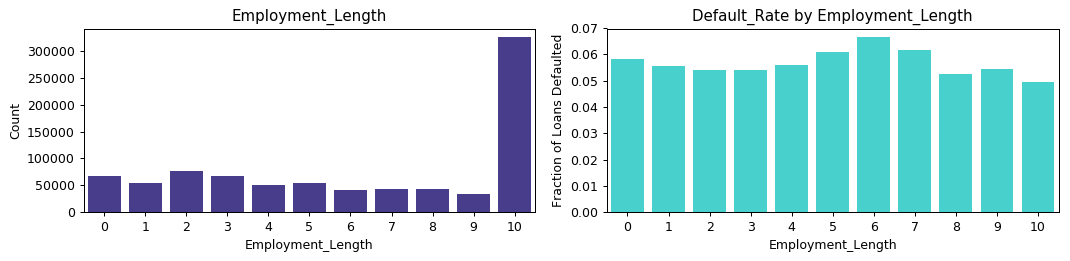

In [33]:
plot_var('emp_length','Employment_Length', continuous= False)

In [34]:
Loan_data.groupby('default_ind')['emp_length'].describe()

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,6.230066,3.676176,0.0,3.0,7.0,10.0,10.0
1,46467.0,6.037059,3.644834,0.0,3.0,6.0,10.0,10.0


Inference: 

Employment Length is plotted against default . its seen that the loan default across the Tenure doesnt vary much (5%-6%)

Recommendation:   Drop Variable 


# Home Ownership

In [35]:
Loan_data['home_ownership'].replace(['NONE','ANY','OTHER','RENT'],0, inplace= True)
Loan_data['home_ownership'].replace(['MORTGAGE'],1, inplace= True)
Loan_data['home_ownership'].replace(['OWN'],2, inplace= True)

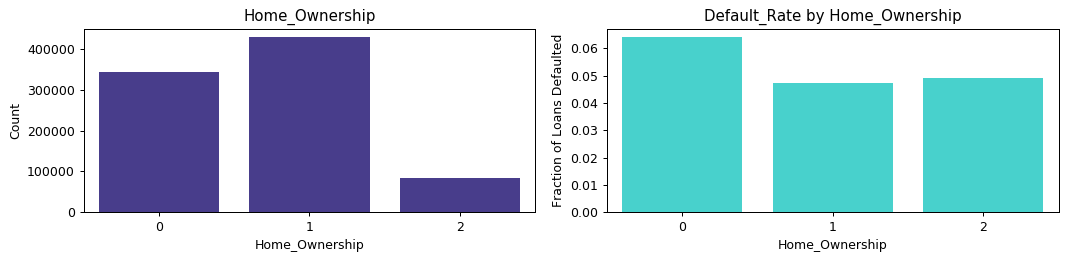

In [36]:
plot_var('home_ownership', 'Home_Ownership', continuous = False)
#plot_treatvar('home_ownership', 'Home_Ownership', continuous = False)

In [37]:
Loan_data.groupby('default_ind')['home_ownership'].value_counts()

default_ind  home_ownership
0            1                 408730
             0                 320771
             2                  80001
1            0                  21956
             1                  20376
             2                   4135
Name: home_ownership, dtype: int64

Inference:
The type of Home Ownership is plotted against Loan Defaults using a bar plot. It can be inferred from the above graph the Own House and Mortaged House holders are at a low risk of defaulting in comparison with the ones living in Rent or Others.

# Annual Income 

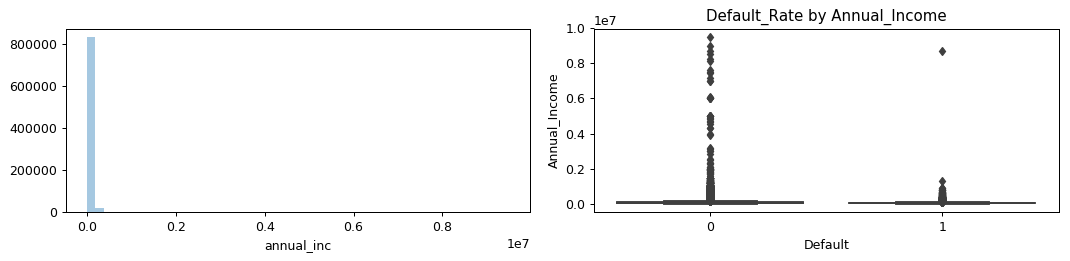

In [38]:
plot_var('annual_inc', 'Annual_Income', continuous=True)

Inference: Skewed distibution, presence of outliers 

Annual Income is plotted against loan Defaulted using box plot 

Recommendation: Outlier treatment and Transformation 

Performing Logarithmic Transformation to address Skewness

In [39]:
# Loan_data['log_annual_inc'] = Loan_data['annual_inc'].apply(lambda x: np.log10(x+1))

# Loan1['log_annual_inc'] = Loan1['annual_inc'].apply(lambda x: np.log10(x+1))

# Verification Status of Salary

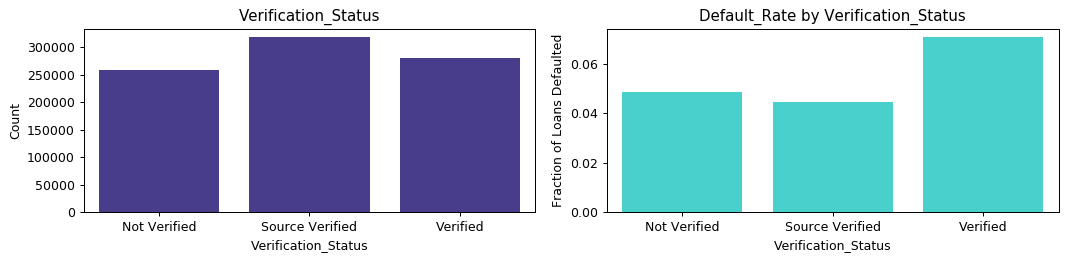

In [40]:
plot_var('verification_status', 'Verification_Status', continuous=False)

In [41]:
Loan_data['verification_status'].head()

0           Verified
1    Source Verified
2       Not Verified
3    Source Verified
4    Source Verified
Name: verification_status, dtype: object

In [42]:
Loan_data['verification_status'].replace(['Not Verified'],0, inplace= True)
Loan_data['verification_status'].replace(['Source Verified'],1, inplace= True)
Loan_data['verification_status'].replace(['Verified'],2, inplace= True)

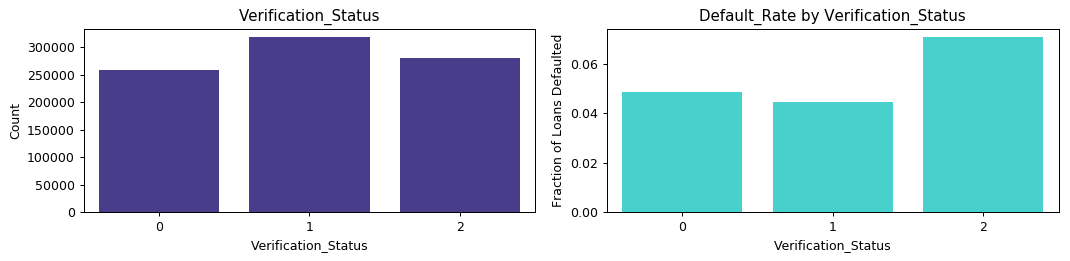

In [43]:
plot_var('verification_status', 'Verification_Status', continuous=False)

In [44]:
Loan_data.groupby('verification_status')['default_ind'].value_counts(normalize=True).sort_values

<bound method Series.sort_values of verification_status  default_ind
0                    0              0.951556
                     1              0.048444
1                    0              0.955365
                     1              0.044635
2                    0              0.929373
                     1              0.070627
Name: default_ind, dtype: float64>

Inference:
Verification Status of Income is plotted against Loans Defaulted using a bar plot . Its evident that the customers with Incomes Verified(not source verified) have a default rate of 6% .

# Payment Plan

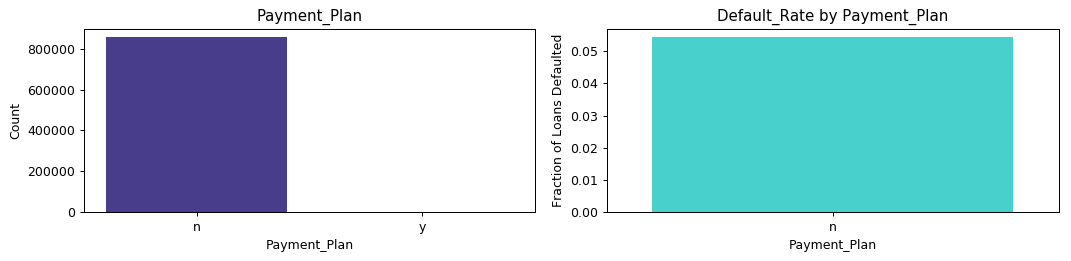

In [45]:
plot_var('pymnt_plan', 'Payment_Plan', continuous=False)

In [46]:
Loan_data['pymnt_plan'].value_counts()

n    855964
y         5
Name: pymnt_plan, dtype: int64

In [47]:
Loan_data.pymnt_plan = Loan_data.pymnt_plan.map(lambda x: 0 if x == 'n' else 1)

Inference:Unique Record dominance in the variable.

Payment Plan is plotted against Loans defaulted using bar graph . its evident that 99.99% of the customers have no payment plan.

Recommendation: Drop Variable

# Purpose of Loan Applied

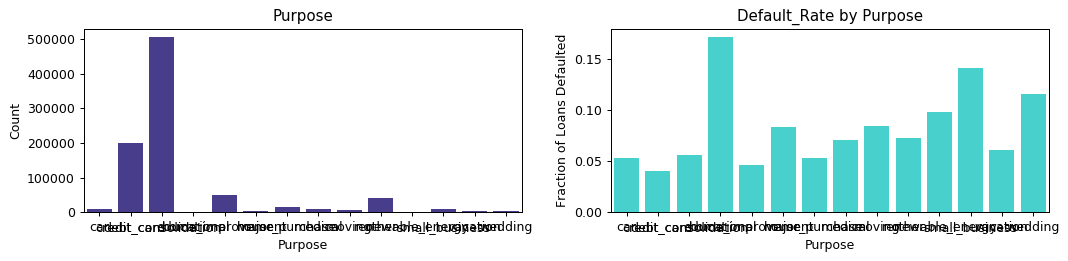

In [48]:
plot_var('purpose','Purpose', continuous=False)

In [49]:
(Loan_data.purpose.value_counts(normalize=True)*100)

debt_consolidation    59.043260
credit_card           23.382155
home_improvement       5.836193
other                  4.783935
major_purchase         1.937804
small_business         1.143149
car                    1.003891
medical                0.957161
moving                 0.602826
vacation               0.530627
house                  0.410412
wedding                0.266365
renewable_energy       0.064138
educational            0.038085
Name: purpose, dtype: float64

In [50]:
Loan_data['purpose'].replace(['educational','renewable_energy','wedding','house','moving','medical','small_business','major_purchase','car','vacation'],'other', inplace= True)

In [51]:
Loan_data.purpose.value_counts()

debt_consolidation    505392
credit_card           200144
other                 100477
home_improvement       49956
Name: purpose, dtype: int64

In [52]:
Loan_data['purpose'].replace(['other','home_improvement'],0, inplace= True)
Loan_data['purpose'].replace(['credit_card'],1, inplace= True)
Loan_data['purpose'].replace(['debt_consolidation'],2, inplace= True)

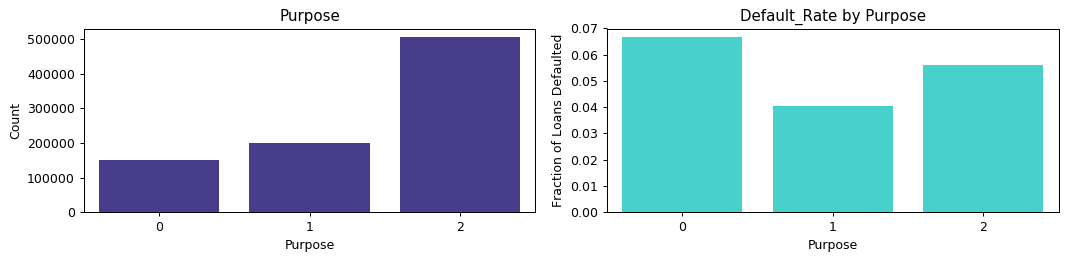

In [53]:
plot_var('purpose','Purpose', continuous=False)

In [54]:
Loan_data['purpose'].value_counts(normalize=True)

2    0.590433
1    0.233822
0    0.175746
Name: purpose, dtype: float64

In [55]:
Loan_data.groupby('default_ind')['purpose'].value_counts(normalize=True)[1]

purpose
2    0.610950
0    0.215615
1    0.173435
Name: purpose, dtype: float64

Inference:
Purpose of Loan is plotted against Loans Defaulted using bar graph. Levels with records less than 4.7% of the total records  in the column are grouped together to minimize the noise level in the column

# State

Text(0.5, 1.0, 'Counts of loan default by states')

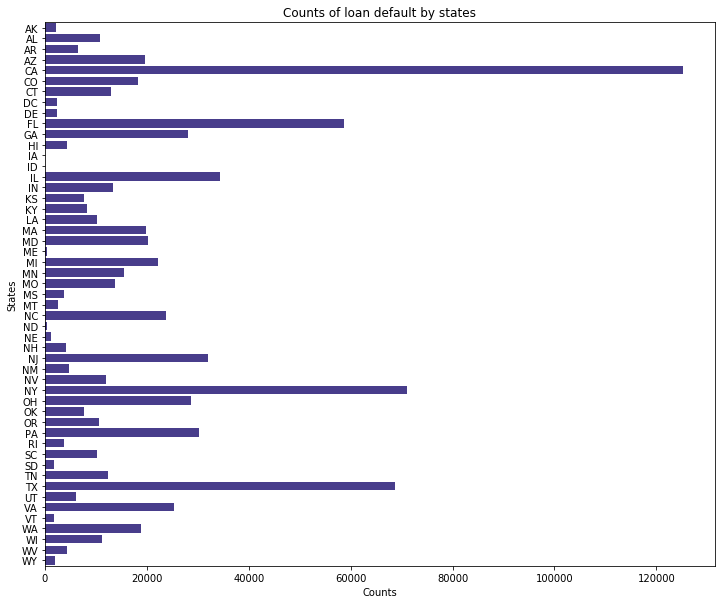

In [56]:
plt.figure(figsize=(12,10))
sns.countplot(order= sorted(Loan_data['addr_state'].unique()), y =Loan_data['addr_state'], color='#483D8B', saturation = 1 )
plt.xlabel('Counts')
plt.ylabel('States')
plt.title('Counts of loan default by states')

In [58]:
Loan_data['addr_state'].value_counts(normalize=True)*100

CA    14.623427
NY     8.308011
TX     8.026926
FL     6.850599
IL     4.016384
NJ     3.745580
PA     3.534006
OH     3.347201
GA     3.276170
VA     2.948004
NC     2.778956
MI     2.590631
MD     2.360950
MA     2.317257
AZ     2.300667
WA     2.198210
CO     2.127530
MN     1.801934
MO     1.605549
IN     1.559402
CT     1.523653
TN     1.447716
NV     1.398649
WI     1.308342
AL     1.253784
OR     1.233923
SC     1.203548
LA     1.189996
KY     0.969544
OK     0.906458
KS     0.898748
AR     0.747574
UT     0.707385
NM     0.555744
HI     0.511701
WV     0.496163
NH     0.485532
RI     0.438450
MS     0.426768
MT     0.288095
DE     0.280618
DC     0.278281
AK     0.249308
WY     0.230616
VT     0.204797
SD     0.203863
NE     0.131313
ME     0.057362
ND     0.052806
ID     0.001051
IA     0.000818
Name: addr_state, dtype: float64

In [ ]:
plt.figure(figsize=(12,10))
Default_rates = Loan_data.groupby('addr_state')['default_ind'].value_counts(normalize=True).loc[:,1]
sns.barplot(y=Default_rates.index, x=Default_rates.values, color='#48D1CC', saturation=1)
plt.ylabel('addr_state')
plt.title('Default_Rate by State')
plt.xlabel('Fraction of Loans Defaulted')

In [59]:
Loan_data['addr_state'].replace(['KY','OK','KS','AR','UT','NM','HI','WV','NH','RI','MS','MT','DE','DC','AK','WY','VT','SD','NE','ME','ND','ID','IA'],0,inplace=True)
Loan_data['addr_state'].replace(['MN','MO','IN','CT','TN','NV','WI','AL','OR','SC','LA'],1,inplace=True)
Loan_data['addr_state'].replace(['VA','NC','MI','MD','MA','AZ','WA','CO'],2, inplace=True)
Loan_data['addr_state'].replace(['NJ','PA','OH','GA'],3, inplace=True)
Loan_data['addr_state'].replace(['IL'],4,inplace=True)
Loan_data['addr_state'].replace(['FL'],6,inplace=True)
Loan_data['addr_state'].replace(['NY','TX'],8,inplace=True)
Loan_data['addr_state'].replace(['CA'],14,inplace=True)


In [62]:
Loan_data['addr_state'].value_counts()

2     167960
8     139822
1     132902
14    125172
3     119005
0      78090
6      58639
4      34379
Name: addr_state, dtype: int64

In [63]:
Loan_data.groupby('addr_state')['default_ind'].value_counts(normalize=True).loc[:,1].sort_values().tail(20)

addr_state
4     0.045667
0     0.048406
8     0.052753
1     0.053596
3     0.053729
2     0.053953
14    0.060261
6     0.061717
Name: default_ind, dtype: float64

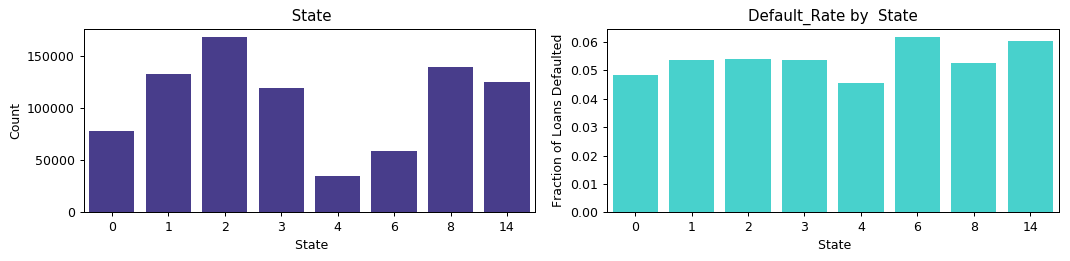

In [64]:
plot_var('addr_state',' State', continuous= False)

Inference :
States are plotted against Loans Defaulted using bar garph. From the graph its evident that Iowa and Idaho have the highest dault rates i.e, 14.29% and 11.11% respectively . The Loans Defaulted doesn't vary much across the states . 



# Debt to Income Ratio 

Text(0.5, 1.0, 'Debt-to-income Ratio')

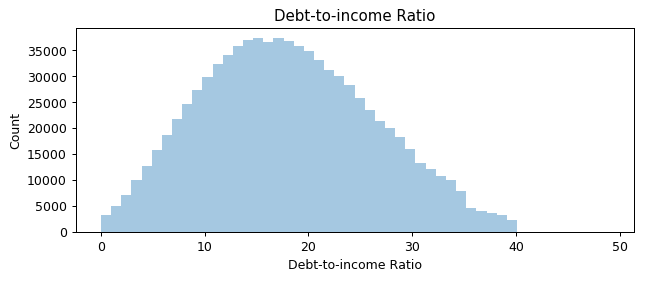

In [65]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(Loan_data.loc[Loan_data['dti'].notnull() & (Loan_data['dti']<50), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

In [66]:
Loan_data.groupby('default_ind')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,18.103677,17.815005,0.0,11.84,17.57,23.88,9999.00
1,46467.0,18.444234,7.950591,0.0,12.61,18.38,24.14,39.98


Inference :

The debt to income ratio doesnt vary much amongst the defaulters and non-defaulters. Their means vary by 0.34

# Delinquency in the Last 2 Years

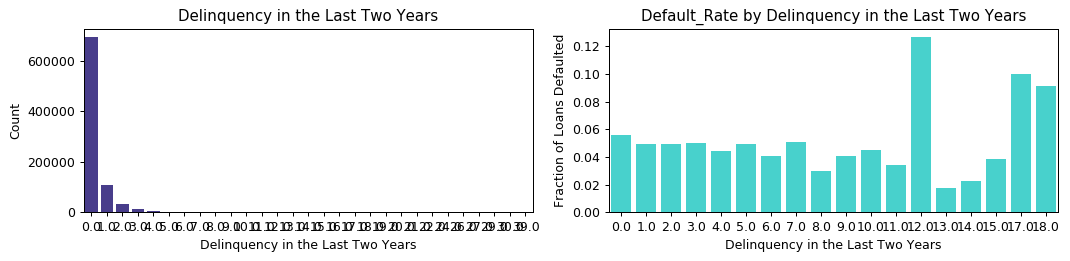

In [67]:
plot_var('delinq_2yrs','Delinquency in the Last Two Years', continuous=False)

In [ ]:
# Loan1['delinq_2yrs'].replace([4,5,6,7,8,9,10,11,12,13,14,15,16,18,17,19,22,26,30,21,20,39,27,29,24],3, inplace= True)

In [68]:
Loan_data.groupby('default_ind')['delinq_2yrs'].describe()

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,0.313508,0.860351,0.0,0.0,0.0,0.0,39.0
1,46467.0,0.278757,0.799408,0.0,0.0,0.0,0.0,18.0


In [69]:
Loan_data['delinq_2yrs'].value_counts(normalize=True).head()

0.0    0.809241
1.0    0.127029
2.0    0.037473
3.0    0.013330
4.0    0.005931
Name: delinq_2yrs, dtype: float64

Inference:
Delinquency in the Last Two Years is Plotted against Loans Defaulted . The default rates do not vary much with  number of delinquencies.  
A possible data leaking future information 

# Inquires in the last  6 months

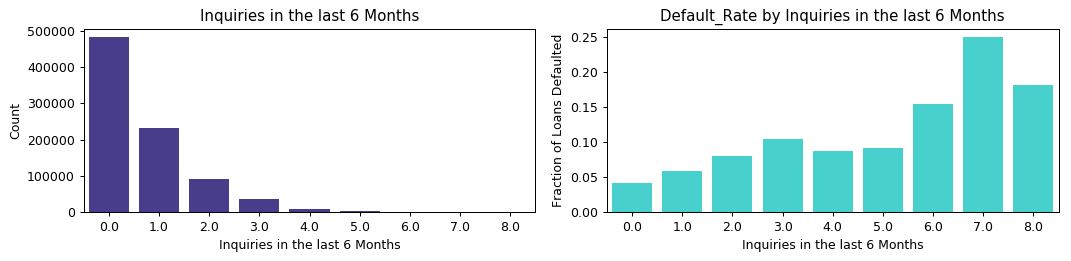

In [70]:
plot_var('inq_last_6mths','Inquiries in the last 6 Months',continuous=False)

In [71]:
Loan_data.groupby('default_ind')['inq_last_6mths'].describe()

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,0.663729,0.950922,0.0,0.0,0.0,1.0,8.0
1,46467.0,0.980309,1.127832,0.0,0.0,1.0,2.0,8.0


Inference:

Inquires in the last 6 months in plotted against Loans Defaultes.  Its seen that the customers with highest no of inquires(7) have highest default rate(25%)

# Current Open Credit Lines

In [72]:
Loan_data['open_acc'].nunique()

77

Text(0.5, 0, 'Fraction of Loans Defaulted')

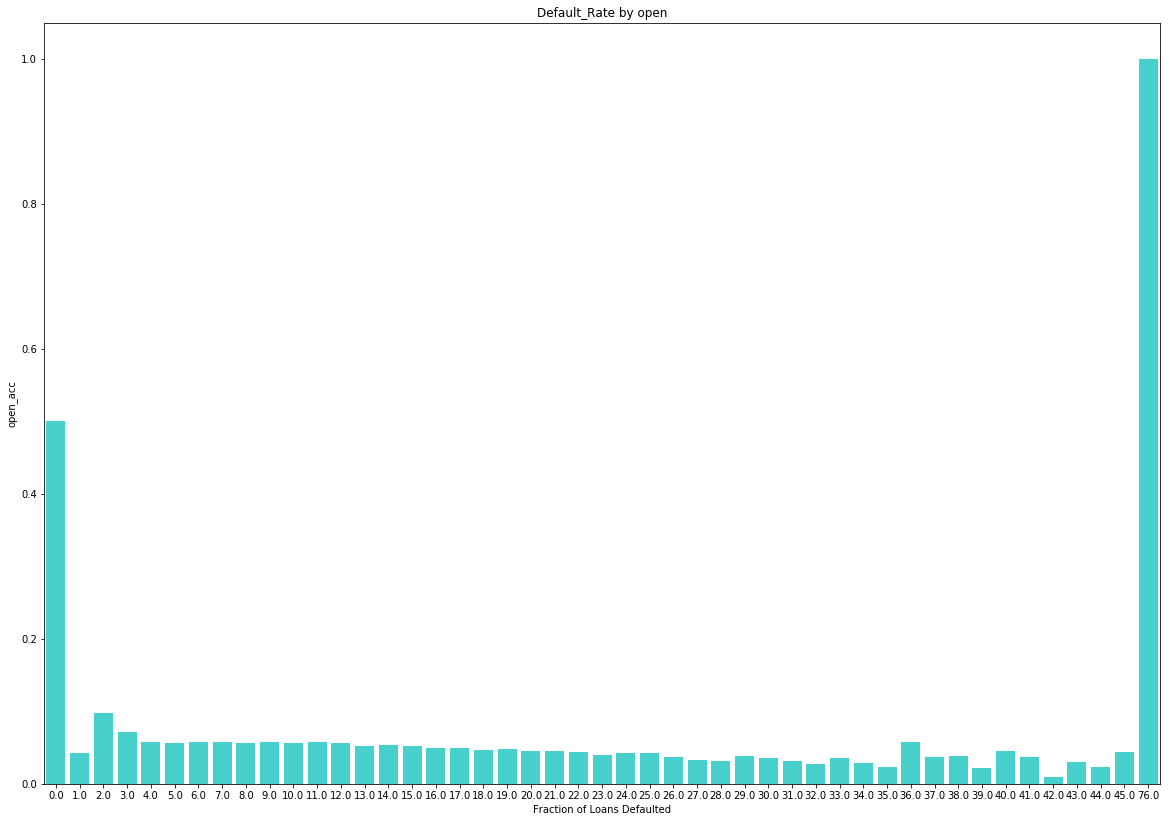

In [73]:
plt.figure(figsize=(20,14))
Default_rate = Loan_data.groupby('open_acc')['default_ind'].value_counts(normalize=True).loc[:,1]
sns.barplot(x=Default_rate.index, y=Default_rate.values, color='#48D1CC', saturation=1)
plt.ylabel('open_acc')
plt.title('Default_Rate by open')
plt.xlabel('Fraction of Loans Defaulted')

In [74]:
Loan_data.groupby('default_ind')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,11.570042,5.327422,0.0,8.0,11.0,14.0,90.0
1,46467.0,11.061721,4.934646,0.0,8.0,10.0,14.0,76.0


# Public Records

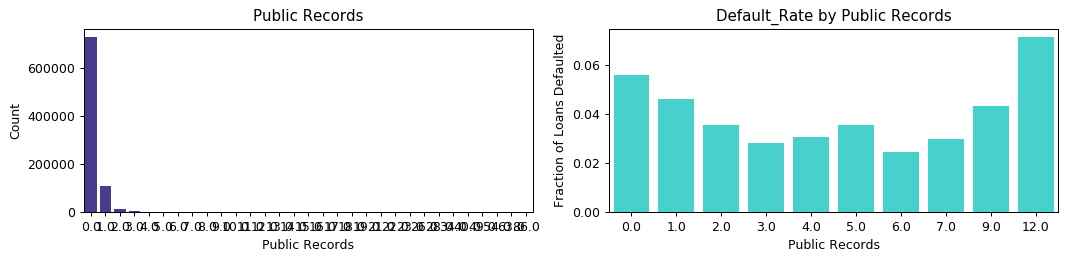

In [75]:
plot_var('pub_rec','Public Records',continuous=False)

In [76]:
Loan_data.groupby('default_ind')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,0.197269,0.588149,0.0,0.0,0.0,0.0,86.0
1,46467.0,0.146943,0.449553,0.0,0.0,0.0,0.0,12.0


Inference:

Public records are plotted against loans defaults using bar graph. The following are observed:

1) Column dominance by the unique value = 0 ( Leads to increase in Bias in the model)

2) With increase in the  number of public records its observed that the loan default decreases.

# Revolving Balance

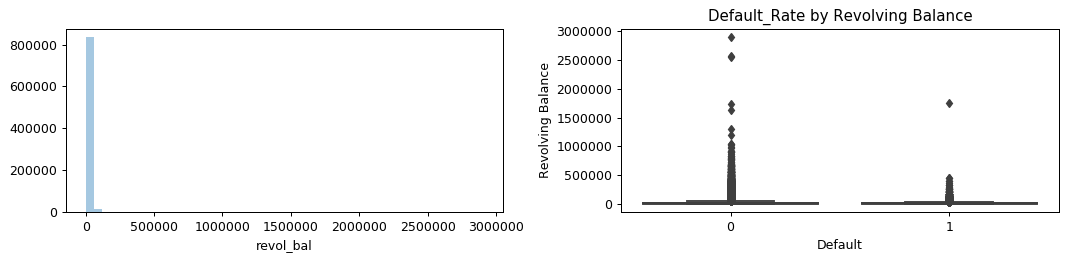

In [77]:
plot_var('revol_bal','Revolving Balance', continuous = True)

Inference: Skewed distibution

Recommendation:Outlier Treatment and Transformation.

In [78]:
#Loan_data['log_revol_bal']= Loan_data['revol_bal'].apply(lambda x:np.log10(x+1))

In [79]:
# Loan_data= Loan_data.drop(['log_revol_bal'],axis=1)

# Loan1= Loan1.drop(['revol_bal'],axis=1)

In [80]:
#plot_var('log_revol_bal','Log Revol Balance',continuous= True)

In [81]:
Loan_data.groupby('default_ind')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,17020.720867,22463.763549,0.0,6481.0,11939.0,20964.75,2904836.0
1,46467.0,14990.838574,17411.124621,0.0,6226.5,11349.0,19213.00,1746716.0


# Revolving Utilization


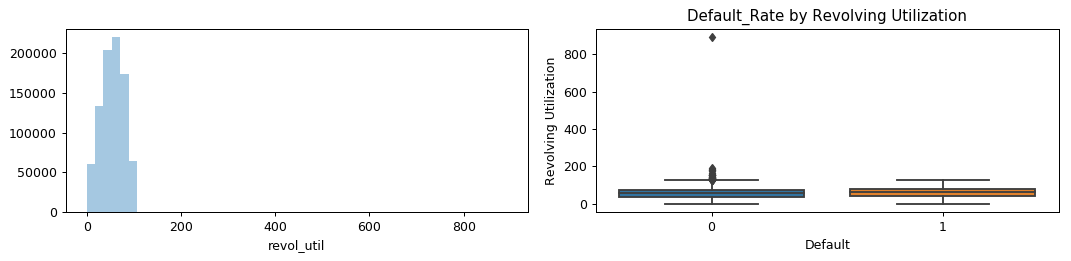

In [82]:
plot_var('revol_util','Revolving Utilization', continuous=True)

In [83]:
Loan_data.groupby('default_ind')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,54.766177,23.799776,0.0,37.4,55.6,73.2,892.3
1,46467.0,59.439342,23.467230,0.0,43.2,61.5,78.0,129.4


Inference: Skewed Distribution, Presence of outliers.

Recommendation: Normalization and treat outliers



In [84]:
# Loan_data['log_revol_util']= Loan_data['revol_util'].apply(lambda x:np.log10(x+1))

In [85]:
# plot_var('log_revol_util','log_revol_util', continuous=True)

In [86]:
# Loan_data= Loan_data.drop(['revol_util'], axis=1)

# Total Credit Lines 


In [87]:
Loan_data['total_acc'].nunique()

134

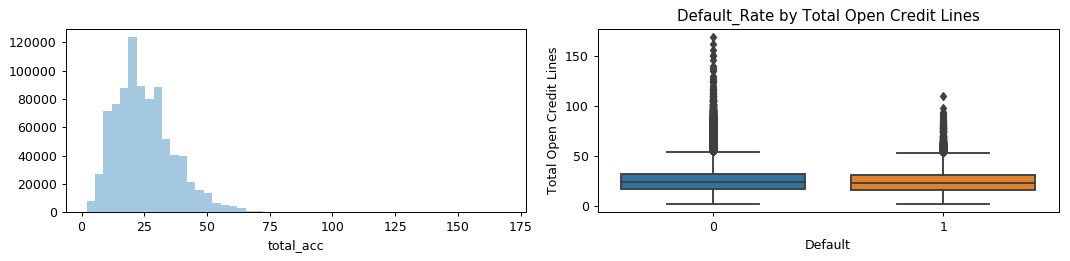

In [88]:
plot_var('total_acc','Total Open Credit Lines', continuous=True)

In [89]:
Loan_data.groupby('default_ind')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,25.328980,11.832300,2.0,17.0,24.0,32.0,169.0
1,46467.0,24.229044,11.532493,2.0,16.0,23.0,31.0,110.0


Inference:
Total Open credit Lines are plotted against Loan defaults . There is not much difference with increase in no Open Credit lines with respect to deafult .

Recommendation: Drop Variable 

# Initial  Listing Status 

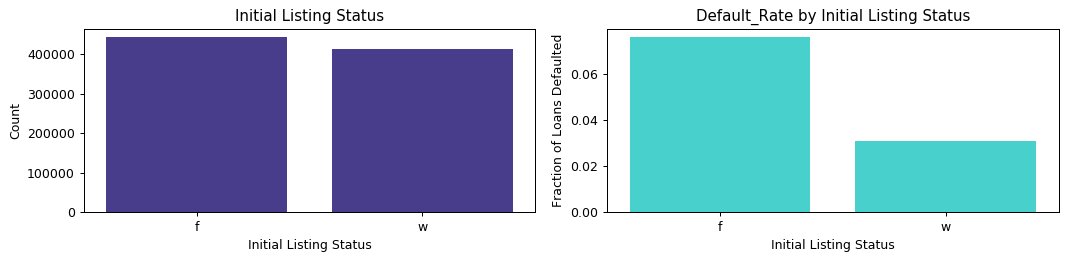

In [90]:
plot_var('initial_list_status','Initial Listing Status', continuous= False)

In [91]:
Loan_data.groupby('default_ind')['initial_list_status'].value_counts(normalize=True)

default_ind  initial_list_status
0            f                      0.505192
             w                      0.494808
1            f                      0.723115
             w                      0.276885
Name: initial_list_status, dtype: float64

Inference:
Initial Listing Status is plotted against Loan Defaults. Fractional Loans are riskier loans with a default rate of over 6%

# Recoveries

In [92]:
Loan_data['recoveries'].nunique()

22627

In [93]:
#plot_var('recoveries','Recoveries',continuous=True)

In [94]:
Loan_data['recoveries'].value_counts(normalize=True).head()

0.00      0.971743
200.00    0.000012
14.28     0.000011
11.70     0.000011
100.00    0.000009
Name: recoveries, dtype: float64

In [95]:
Loan_data.groupby('default_ind')['recoveries'].value_counts(normalize=True)

default_ind  recoveries
0            0.00          1.000000
1            0.00          0.479480
             200.00        0.000215
             11.70         0.000194
             14.28         0.000194
             10.00         0.000172
             10.40         0.000172
             16.50         0.000172
             100.00        0.000172
             800.00        0.000172
             10.08         0.000151
             10.20         0.000151
             11.20         0.000151
             12.00         0.000151
             16.80         0.000151
             10.35         0.000129
             10.56         0.000129
             10.66         0.000129
             10.92         0.000129
             11.16         0.000129
             12.24         0.000129
             13.20         0.000129
             13.44         0.000129
             13.50         0.000129
             19.20         0.000129
             1200.00       0.000129
             2500.00       0.000129
    

Inference:
Records with 0 comprises 97% of the total records . Thus, considering this variable in the model it to be biased towards the value 0

Recommendation: Drop Variable 



# Collection Recovery Fee

In [96]:
#plot_var('collection_recovery_fee','Collection Recovery Fee', continuous= True)

In [97]:
Loan_data['collection_recovery_fee'].value_counts(normalize=True).head()

0.00    0.973089
2.00    0.000018
4.52    0.000013
1.88    0.000013
2.52    0.000013
Name: collection_recovery_fee, dtype: float64

Inference:
Column Dominance by value = 0 which comprises 97% of the total records.

Recommendation: Drop Variables 


# Collections in the last 12 months excluding medical collections

In [98]:
Loan_data['collections_12_mths_ex_med'].value_counts(normalize= True).head()

0.0    0.986980
1.0    0.012057
2.0    0.000828
3.0    0.000093
4.0    0.000026
Name: collections_12_mths_ex_med, dtype: float64

In [99]:
#plot_var('collections_12_mths_ex_med','Collections in the last 12 months excluding medical collections', continuous= False)

Inference:
Collections in the last 12 months excluding Medical Collections is plotted against Loans Default . The following is observed:

1)Column Dominance shown by the Value=0 , comprising 98.7% of the total records . 

Recommendation: Drop the Variable 

# Application Type 


In [100]:
Loan_data['application_type'].value_counts(normalize= True)

INDIVIDUAL    0.999484
JOINT         0.000516
Name: application_type, dtype: float64

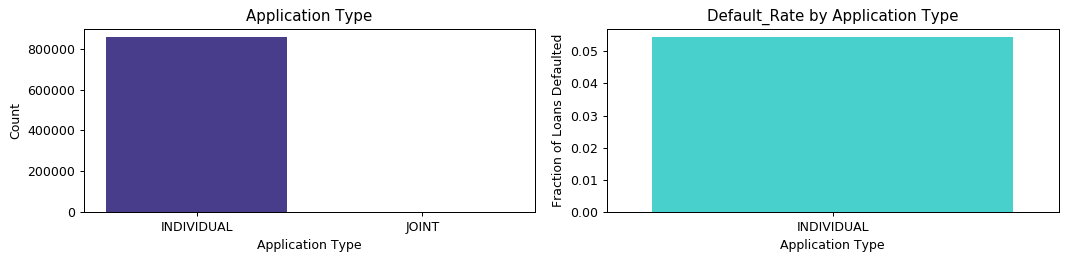

In [101]:
plot_var('application_type','Application Type', continuous= False)

In [102]:
Loan_data.groupby('default_ind')['application_type'].value_counts()

default_ind  application_type
0            INDIVIDUAL          809060
             JOINT                  442
1            INDIVIDUAL           46467
Name: application_type, dtype: int64

In [103]:
Loan_data.application_type = Loan_data.application_type.map(lambda x: 0 if x == 'INDIVIDUAL' else 1)

Inference:
Class dominance exhibited by the application type(Individual) comprising 99.9% of the total records.

Recommendation: Drop the variable 

# No of Accounts now Delinquent

In [104]:
Loan_data['acc_now_delinq'].value_counts(normalize=True).head()

0.0    0.995409
1.0    0.004314
2.0    0.000231
3.0    0.000033
4.0    0.000007
Name: acc_now_delinq, dtype: float64

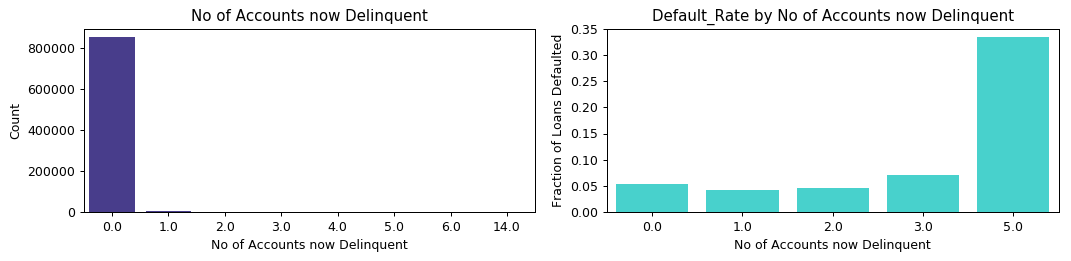

In [105]:
plot_var('acc_now_delinq','No of Accounts now Delinquent', continuous= False)

Inference:
No of  Accounts now delinquent is plotted against Loan Default. The following observations can be made:

1)Column dominance is shown by the unique value = 0( Add bias in the model)

2)Higher the number of accounts with delinquencies , higher are the chances of defaulting on the loans.

Recommendation: Drop Variable

# Total Collection Amount 

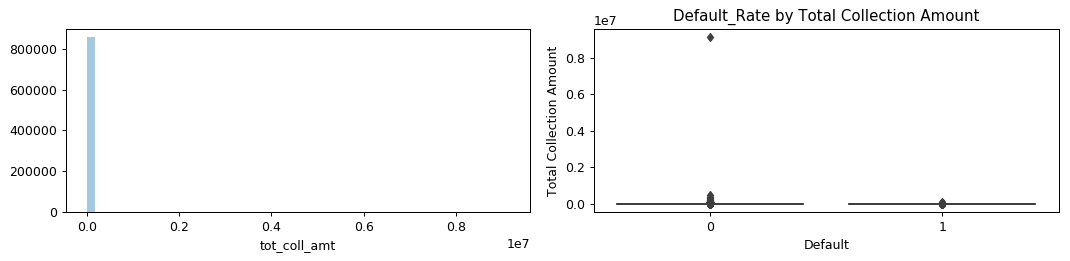

In [106]:
plot_var('tot_coll_amt','Total Collection Amount', continuous= True)

Inference: Skewed distribuitn, Presence of outliers
    
Recommendation: Transformation and outlier treatment   

In [107]:
Loan_data['tot_coll_amt'].value_counts(normalize=True).head()

0.0      0.869628
50.0     0.001972
100.0    0.001527
75.0     0.001166
200.0    0.000804
Name: tot_coll_amt, dtype: float64

In [108]:
# Loan_data=Loan_data.drop(['tot_coll_amt'],axis=1)
# Loan1=Loan1.drop(['tot_coll_amt'],axis=1)

Recommendation: Drop Variable 

# Total Current Balance

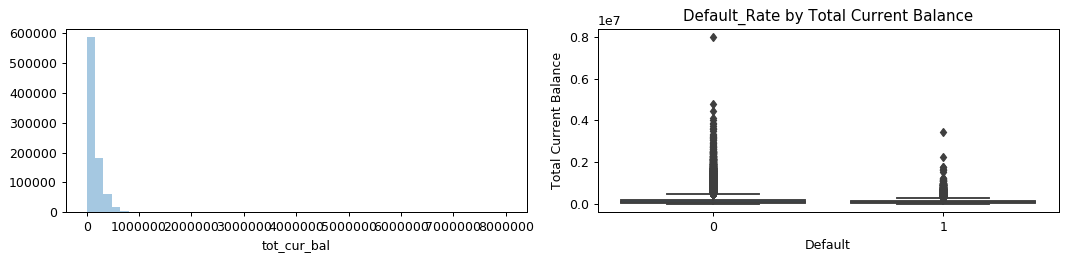

In [109]:
plot_var('tot_cur_bal','Total Current Balance', continuous=True)

Inference: skewed Distribution and Presence of outliers

Recommendation: Transformation and treatment of outliers

In [110]:
#Loan_data['log_tot_cur_bal']= Loan_data['tot_cur_bal'].apply(lambda x: np.log10(x+1))
# Loan1['log_tot_cur_bal']= Loan1['tot_cur_bal'].apply(lambda x: np.log10(x+1))

In [111]:
#Loan_data.groupby('default_ind')['log_tot_cur_bal'].describe()

In [112]:
 #Loan_data=Loan_data.drop(['log_tot_cur_bal'],axis=1)

# Loan1=Loan1.drop(['tot_cur_bal'],axis=1)

# Total Revolving High Credit Limit 

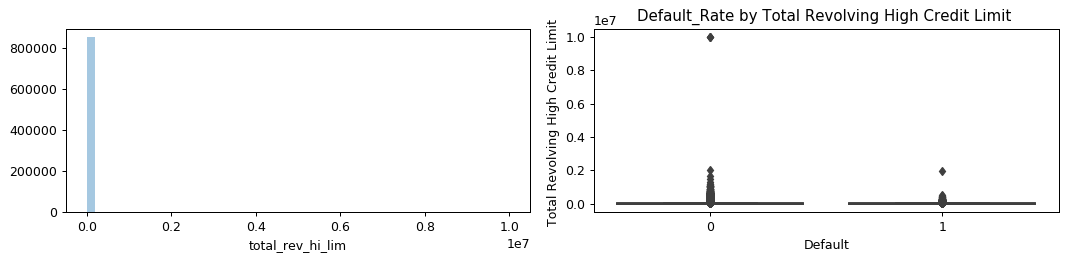

In [113]:
plot_var('total_rev_hi_lim','Total Revolving High Credit Limit ', continuous= True)

Inference: Skewed distribution and presence of outliers

Recommendation: Transformation and treatment of outliers

In [114]:
# Loan_data['log_total_rev_hi_lim']=Loan_data['total_rev_hi_lim'].apply(lambda x: np.log10(x+1))
# Loan1['log_total_rev_hi_lim']=Loan1['total_rev_hi_lim'].apply(lambda x: np.log10(x+1))

In [115]:
 #Loan_data=Loan_data.drop(['log_total_rev_hi_lim'],axis=1)
# Loan1=Loan1.drop(['total_rev_hi_lim'],axis=1)

In [116]:
 #plot_var('log_total_rev_hi_lim','Log_total_rev_hi_lim', continuous=True)

In [117]:
 #Loan_data.groupby('default_ind')['log_total_rev_hi_lim'].describe()

# Default Status

In [118]:
Loan_data['default_ind'].value_counts(normalize=True)

0    0.945714
1    0.054286
Name: default_ind, dtype: float64

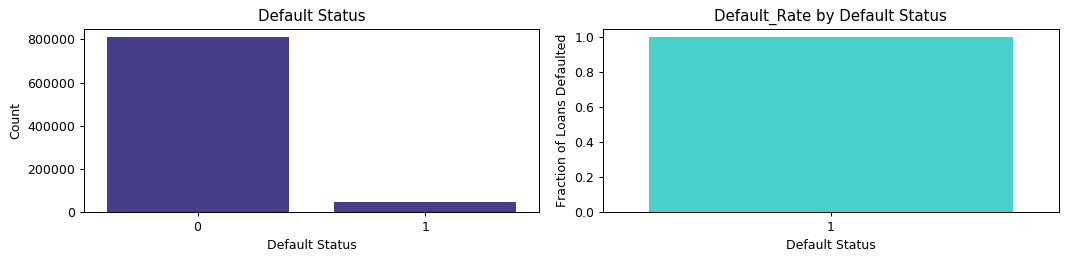

In [119]:
plot_var('default_ind','Default Status', continuous= False)

Inference: Imbalance in the Response Variable 

Recommendation: SMOTE Analysis

# Dropping Variables based on the inferences made from the visualization

In [120]:
print(Loan_data.columns.tolist())

['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'recoveries', 'collection_recovery_fee', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind']


In [121]:
Loan=Loan_data.drop(['sub_grade','earliest_cr_line','initial_list_status','last_credit_pull_d','recoveries',
                     'collection_recovery_fee','collections_12_mths_ex_med'], axis=1)

In [122]:
Loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [123]:
Loan.to_csv('Loan_clean.csv')

In [124]:
Loan_wd= Loan.drop(['issue_d'], axis=1)
Loan_isd= Loan.issue_d

In [125]:
data= Loan_wd.drop(['default_ind'],axis=1)

In [126]:
scl = preprocessing.StandardScaler() #instance of preprocessing
fields = data.columns.values
data_clean = pd.DataFrame(scl.fit_transform(data[fields]), columns = fields)
data_clean['default_ind'] = Loan_wd['default_ind']
data_clean['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [127]:
data_scl= pd.concat([data_clean,Loan_isd],axis=1)

In [128]:
data_scl.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,issue_d
0,-1.156698,-0.652755,-0.581985,-0.596218,1.028757,-1.093373,-0.794704,1.229388,-0.002417,-0.537959,-0.638436,0.546834,-0.363538,0.330990,-1.609326,-0.334495,-0.146804,1.204776,-1.376554,-0.02273,-0.063932,-0.020627,-0.3643,-0.212535,0,Dec-2011
1,-1.453422,1.531967,0.475620,0.170277,-1.692526,-1.093373,-0.701340,-0.032896,-0.002417,-1.835224,-0.417567,-0.982699,-0.363538,4.480228,-1.609326,-0.334495,-0.685012,-1.916368,-1.799608,-0.02273,-0.063932,-0.020627,-0.3643,-0.212535,1,Dec-2011
2,-1.465291,-0.652755,0.633574,0.170277,1.028757,-1.093373,-0.977511,-1.295180,-0.002417,-1.835224,-0.196698,-0.539622,-0.363538,1.368299,-1.797718,-0.334495,-0.627911,1.826484,-1.291944,-0.02273,-0.063932,-0.020627,-0.3643,-0.212535,0,Dec-2011
3,-0.563250,-0.652755,0.068145,0.170277,1.028757,-1.093373,-0.402574,-0.032896,-0.002417,-1.835224,2.011991,0.107775,-0.363538,0.330990,-0.290584,-0.334495,-0.509029,-1.429083,0.992546,-0.02273,-0.063932,-0.020627,-0.3643,-0.212535,0,Dec-2011
4,-1.394078,1.531967,-0.114990,-0.596218,-1.420398,-1.093373,0.076696,-0.032896,-0.002417,-1.835224,-0.859304,-0.010455,-0.363538,-0.706319,0.651374,-0.334495,0.489228,-0.047042,1.077156,-0.02273,-0.063932,-0.020627,-0.3643,-0.212535,0,Dec-2011


In [129]:
import datetime
data_scl['issue_d'] = pd.to_datetime(data_scl['issue_d'])
data_scl = data_scl.set_index(data_scl['issue_d'])
data_scl=data_scl.sort_index()
data_scl=data_scl.drop(['issue_d'], axis=1)

In [130]:
data_train = data_scl['2007-06-10':'2015-05-20']
data_test  = data_scl['2015-05-21':]

In [131]:
data_scl.to_csv('data_scale.csv')

In [132]:
data_train.to_csv('train.csv')

data_test.to_csv('test.csv')

In [133]:
X_train= data_train.drop(['default_ind'],axis=1)
y_train=data_train['default_ind']

X_test = data_test.drop(['default_ind'],axis=1)
y_test=data_test['default_ind']


print('X_train Dataset:',X_train.shape)
print('y_train Dataset:',y_train.shape)

print('X_test Dataset:',X_test.shape)
print('y_test Dataset:',y_test.shape)

X_train Dataset: (598977, 24)
y_train Dataset: (598977,)
X_test Dataset: (256991, 24)
y_test Dataset: (256991,)
